# **Import Libraries and modules**

installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Ploting sample from train data set.

(60000, 28, 28)


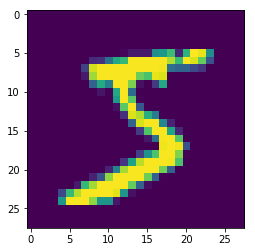

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

1st Vanilla network DNN

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Printing model summary to understand current paramaters for the model. 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training model for 20 epoch for 32 batch size

In [13]:
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.2005 - acc: 0.9412 - val_loss: 0.0749 - val_acc: 0.9776
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0712 - acc: 0.9781 - val_loss: 0.0654 - val_acc: 0.9791
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0530 - acc: 0.9843 - val_loss: 0.0613 - val_acc: 0.9818
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0434 - acc: 0.9860 - val_loss: 0.0697 - val_acc: 0.9807
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0569 - val_acc: 0.9835
Epoch 6/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0281 - acc: 0.9909 - val_loss: 0.0811 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 9s 144us/step -

Plotting training and validation accuracty as well as loss for every epoch

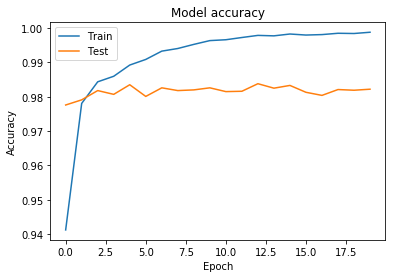

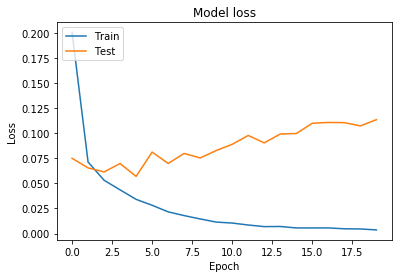

In [14]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [16]:
print(score)

[0.11338027557383065, 0.9822]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[4.32320416e-30 4.76427071e-25 1.37244579e-20 4.68731262e-14
  1.96497270e-33 4.36594752e-22 0.00000000e+00 1.00000000e+00
  3.17946919e-17 8.25077816e-19]
 [1.05031172e-16 6.74491591e-18 1.00000000e+00 2.39203878e-16
  2.63310476e-35 1.70655542e-23 4.76778583e-15 8.65746814e-34
  8.79830493e-18 9.17265397e-26]
 [1.94095087e-12 9.99998927e-01 9.33555313e-08 1.09372841e-12
  3.84565304e-08 2.49289565e-12 1.62698891e-12 2.22806640e-09
  9.04363958e-07 3.47887084e-13]
 [1.00000000e+00 5.14325625e-25 2.10540502e-13 1.79196401e-24
  4.49620565e-32 2.21194399e-17 2.72693990e-14 1.64388834e-19
  6.10385342e-18 1.39739922e-17]
 [1.26516267e-19 1.34444749e-21 7.69090167e-17 5.84856108e-18
  1.00000000e+00 4.39413689e-21 4.91885142e-22 1.59443867e-16
  2.70340094e-15 3.08251846e-09]
 [1.08071486e-17 9.99998450e-01 1.65834759e-11 5.50411326e-16
  5.25854048e-11 8.62742960e-17 5.11333276e-19 1.50639380e-06
  1.55489239e-08 7.75254952e-15]
 [1.00951400e-33 8.34308179e-21 6.07410376e-14 3.49661156e

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f5b1d590ba8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f5b1de14c88>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f5b1de14b38>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f5b1de14400>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f5b1d5db780>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()